## 겨울철 교통사고 뉴스 크롤링 및 데이터 분석


=== Page 1 ===

1. 제목: 눈길에 교통사고 났다고요? 후유증 찝찝하다면 [일터 일침]
   링크: https://www.sedaily.com/NewsView/2DIB4TIXGI
   미리보기: 연말연시는 매서운 한파가 예고된 데다 교통사고 위험도 증가하는 시기이기 때문에 안전과 건강에 각별히 신경 쓸 필요가 있다. 지난 12일... 겨울철 빙판길 사고는 무엇보다 예방이 중요하다. 평소 차량 점검과 방어 운전 습관을 들이고 감속 운전을 실천해야 한다. 이 같은 주의에도 사고가 발생했다면...

2. 제목: 김문수 "배달종사자 사고 위험…플랫폼 운영사 한파대책 필요"
   링크: https://www.newsis.com/view/NISX20241223_0003007422
   미리보기: 이에 김 장관은 이날 한랭질환 예방 3대 수칙(따뜻한 옷, 물, 쉼터)과 겨울철 교통사고 예방 수칙(빙판길 저속 운전, 안전모 착용) 등을 준수할 것을 요청했다. 아울러 김 장관은 "겨울철 도로 위에서 일하는 배달종사자들의 건강과 안전을 세심하게 관리할 필요가 있다"며 "플랫폼 운영사도 적극적으로 한파 대책을...

3. 제목: 노동당국, 겨울철 화재·폭발·붕괴 등 안전사고 예방 점검
   링크: https://biz.heraldcorp.com/article/10022082?ref=naver
   미리보기: 김문수 고용노동부 장관이 23일 서울 영등포구 타임스퀘어 앞 픽업존에서 겨울철 배달종사자 교통사고와 한랭질환 예방을 위한 안전 ON 캠페인을 하고 있다. [고용노동부 제공] 노동당국이 건설업, 제조업, 물류센터와 같은 택배업, 폐기물처리업 등을 대상으로 겨울철 발생할 수 있는 안전사고를 예방하기 위한...

4. 제목: 겨울철 '꽈당' 낙상사고 80만 건…상해보험으로 보장받으세요
   링크: https://www.etoday.co.kr/news/view/2432868
   미리보기: 더해 교통사고로 인한 부상까지 보장한다. 비용이 큰 상해MRI검사지원비(급여),

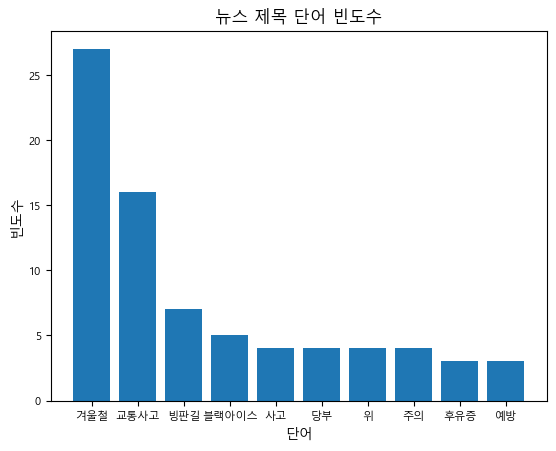

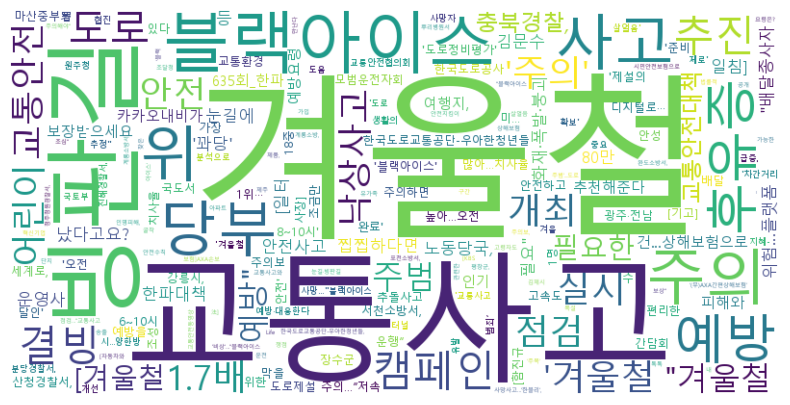

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

# 검색어 및 URL 설정
search_query = "겨울철 교통사고"
base_url = "https://search.naver.com/search.naver?where=news&query={query}&start={start}"

# 헤더 설정
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}
# 뉴스 기사 가져오기 함수 정의
def fetch_news(query, pages):
    news_data = []  # 데이터를 저장할 리스트

    for page in range(1, pages + 1):
        start = (page - 1) * 10 + 1
        url = base_url.format(query=query, start=start)

        # 요청 및 응답 받기
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # 뉴스 기사 정보 가져오기
            news_items = soup.select(".news_area")
            
            print(f"\n=== Page {page} ===\n")
            for idx, item in enumerate(news_items, 1):
                # 제목과 링크 추출
                title = item.select_one(".news_tit").get_text()
                link = item.select_one(".news_tit")['href']
                
                # 미리보기 텍스트 추출
                preview = item.select_one(".dsc_txt_wrap").get_text() if item.select_one(".dsc_txt_wrap") else "No preview available."

                print(f"{idx}. 제목: {title}")
                print(f"   링크: {link}")
                print(f"   미리보기: {preview}\n")

                # 데이터를 리스트에 추가
                news_data.append({"제목": title, "링크": link, "미리보기": preview})
        else:
            print(f"Failed to fetch data for page {page}. Status code: {response.status_code}")

    return news_data

# 단어 빈도수 및 워드클라우드 시각화 함수 정의
def visualize_word_frequency_and_cloud(titles):
    # 모든 제목에서 단어 추출
    words = " ".join(titles).split()
    
    # 단어 빈도 계산
    word_counts = Counter(words)

    # 가장 많이 등장한 단어 10개 선택
    most_common_words = word_counts.most_common(10)

    # 텍스트로 출력
    print("\n단어 빈도수 분석 결과:")
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # 그래프 시각화
    words, counts = zip(*most_common_words)
    plt.bar(words, counts)
    plt.xlabel('단어')
    plt.ylabel('빈도수')
    plt.title('뉴스 제목 단어 빈도수')
    plt.xticks(fontsize=8)  # x축 폰트 크기
    plt.yticks(fontsize=8)  # y축 폰트 크기
    plt.show()

    # 워드클라우드 생성 및 시각화
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('')
    plt.show()

# 실행
def main():
    pages = 5
    news_data = fetch_news(search_query, pages)

    # 데이터를 DataFrame으로 변환
    df = pd.DataFrame(news_data)

    # 엑셀 파일로 저장
    excel_filename = "news_results.xlsx"
    df.to_excel(excel_filename, index=False)
    print(f"\nData saved to {excel_filename}")

    # 제목 단어 빈도수 분석 및 시각화
    titles = df["제목"].tolist()
    visualize_word_frequency_and_cloud(titles)

# 실행
main()